In [ ]:
!pip install tensorflow==2.0.0-alpha0 

In [6]:
!pip install tensorflow==2.0.0-alpha0 
#import tensorflow as tf
mnist= tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels)= mnist.load_data()
training_images= training_images/255.0
test_images= test_images/255.0
model= tf.keras.models.Sequential([
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss= model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6375 - accuracy: 0.7760
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3840 - accuracy: 0.8614
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3361 - accuracy: 0.8764
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3168 - accuracy: 0.8856
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3599 - accuracy: 0.8696


**89% on training & 87% on validation**

**With convolution**


In [3]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [4]:
 
mnist= tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels)= mnist.load_data()
training_images= training_images.reshape(60000, 28, 28, 1)
training_images= training_images/255.0
test_images= test_images.reshape(10000, 28, 28, 1)
test_images= test_images/255.0


4423680/4422102 [==============================] - 0s 0us/step


In [5]:
model= tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [7]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
model.fit(training_images, training_labels, epochs=5)
test_loss= model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.6121 - accuracy: 0.7756
Epoch 2/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2998 - accuracy: 0.8879
Epoch 3/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2496 - accuracy: 0.9078
Epoch 4/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.2183 - accuracy: 0.9183
Epoch 5/5
313/313 [==============================] - 4s 13ms/step - loss: 0.2506 - accuracy: 0.9085


***93% on the training data and 91% on the validation data. ***

EXERCISES

    1 Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

   2 Remove the final Convolution. What impact will this have on accuracy or training time?

  3  How about adding more Convolutions? What impact do you think this will have? Experiment with it.

   4 Remove all Convolutions but the first. What impact do you think this will have? Experiment with it.

   5 In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here! **bold text**


   ** 1 Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.**

In [32]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.4.1
11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2975 - accuracy: 0.9132
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0514 - accuracy: 0.9850
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0285 - accuracy: 0.9910
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0190 - accuracy: 0.9939
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0123 - accuracy: 0.9964
Epoch 6/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0097 - accuracy: 0.9969
Epoch 7/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0071 - accuracy: 0.9974
Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0041 - accuracy: 0.9987
Epoch 9/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0051 - accuracy: 

**99% on training and 98% on validation**







2 Remove the final Convolution. What impact will this have on accuracy or training time?

In [33]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model= tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(training_images, training_labels, epochs=5)
test_loss= model.evaluate(test_images, test_labels)

2.4.1
Epoch 1/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2735 - accuracy: 0.9158
Epoch 2/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0460 - accuracy: 0.9857
Epoch 3/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0261 - accuracy: 0.9918
Epoch 4/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0161 - accuracy: 0.9950
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0447 - accuracy: 0.9865


**99% on training & 98% on validation but loss is low**

**3 How about adding more Convolutions? What impact do you think this will have? Experiment with it**

In [36]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model= tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.4.1
Epoch 1/10
1875/1875 [==============================] - 80s 42ms/step - loss: 0.4238 - accuracy: 0.8673
Epoch 2/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0813 - accuracy: 0.9751
Epoch 3/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0497 - accuracy: 0.9843
Epoch 4/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0383 - accuracy: 0.9882
Epoch 5/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0306 - accuracy: 0.9902
Epoch 6/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0234 - accuracy: 0.9925
Epoch 7/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0188 - accuracy: 0.9934
Epoch 8/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0175 - accuracy: 0.9946
Epoch 9/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0125 - accuracy: 0.9961
Epoch 10/10
313/313 [==============================] - 4s 

**99% on training & 98% on validation**

**Visualizing the Convolutions and Pooling**

In [12]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


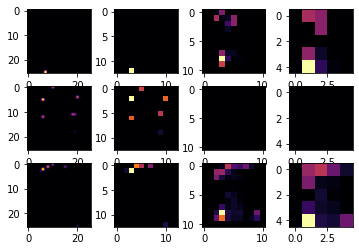

In [31]:
import matplotlib.pyplot as plt
f, axarr= plt.subplots(3,4) #3 rows and 4 columns 
FIRST_IMAGE= 4
SECOND_IMAGE= 7
THIRD_IMAGE= 26
CONVOLUTION_NUMBER= 5
from tensorflow.keras import models
layer_outputs= [layer.output for layer in model.layers]
activation_model= tf.keras.models.Model(inputs= model.input, outputs= layer_outputs)
for x in range(0,4):
  f1= activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0, x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0, x].grid(False)
  f2= activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1, x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1, x].grid(False)
  f3= activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2, x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2, x].grid(False)
